# Evaluating a model lab

## Review: building a model

### 1. Reviewing our data

Let's take another look at our restaurant data. Below we have data showing the temperatures and number of restaurant customers over five days.

| temperature        | actual customers           
| ------------- |:-------------:| 
|    80       | 120 | 
|    65        | 100 | 
|    50        | 85 | 
|    70        | 100 | 
|    60        | 90 | 


We'll use our `trace_values` method to plot this data.

In [4]:
temperatures = [80, 65, 50, 70, 60]
amounts = [120, 100, 85, 100, 90]

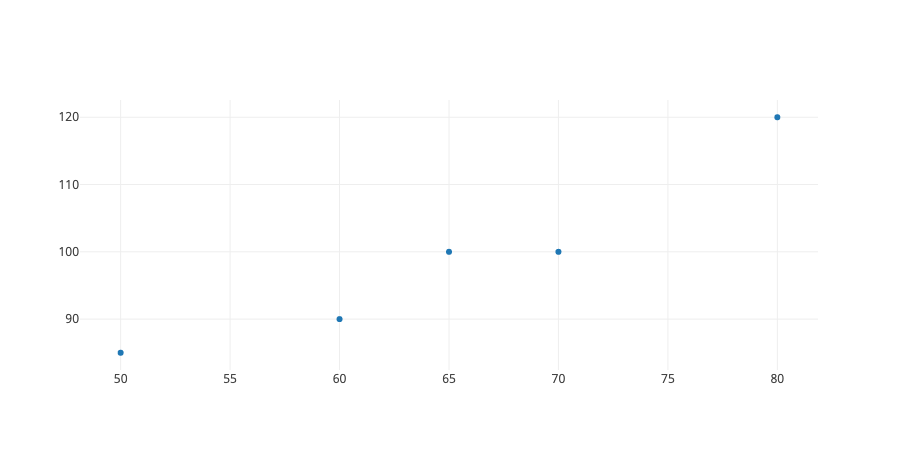

In [60]:
from graph import trace_values, plot
data_trace = trace_values(temperatures, amounts)
plot([data_trace])

### 2. Building a model

We start to see that there's an association between temperature and the amount of customers in the restaurant.  It looks like an increase in temperature is associated with an increase in temperature, so we start with the following formula as our machine learning model.

$$ amount\_of\_customers = 1.3 * temperature $$

Now we can translate this into formula into the following function.

In [61]:
def predicted_customers(temperature):
    return 1.3*temperature

And we can plot these like so.

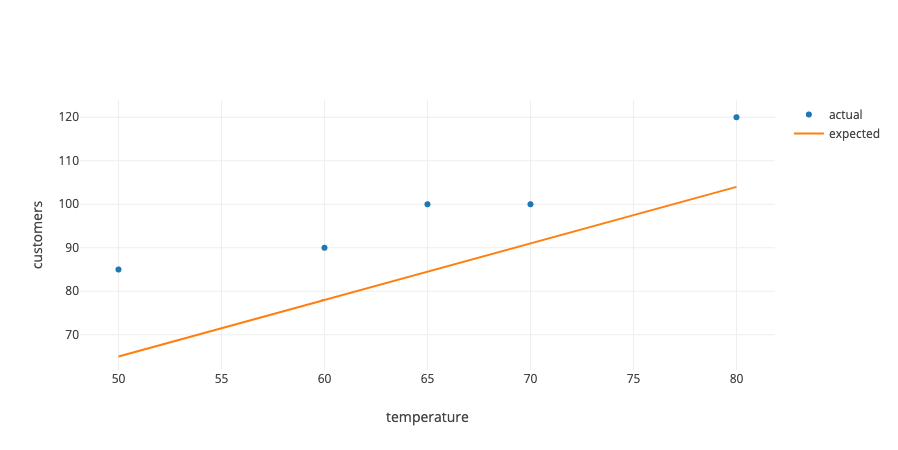

In [62]:
from graph import trace_values, plot
data_trace = trace_values(temperatures, amounts, name = 'actual')
predicted_amounts = list(map(lambda temperature: 1.3*temperature,temperatures))
model_trace = trace_values(temperatures, predicted_amounts, name = 'expected', mode = 'lines')

layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([data_trace, model_trace], layout = layout)

## Do: Evaluate the model

To evaluate the model, let's start by calculating the error at each point.

| temperature   | actual customers | expected customers| error | 
| ------------- |:-------------:   |:-----------------:|:-----:| 
|    80         | 120              | 104               | ?     |
|    65         | 100              | 84.5              | ?     |
|    50         | 85               | 65                | 15    |
|    70         | 100              | 91                | 9     |
|    60         | 90               | 78                | 12    |


In [63]:
error_day_1 = None

In [64]:
error_day_2 = None

Ok, now it we should even be able to write a function that calculates the error at each point.

In [65]:
def error(actual, expected):
    return actual - expected

In [66]:
error(120, 104)
# 16

16

And a function that allows us to pass through a list of actual data, a separate list of expected data, and return a list of errors.

In [3]:
def errors(actuals, expecteds):
    pass

> Hint: One way to do this is to use the Python function `zip` - Google to see how.

In [68]:
calculated_errors = errors(amounts, predicted_amounts)
calculated_errors
# [16.0, 15.5, 20.0, 9.0, 12.0]

[16.0, 15.5, 20.0, 9.0, 12.0]

Now let's add our errors to our traces above.

> Press shift enter below.  If you're curious as to how `error_line_traces` works, inspect the function in the `error.py` file.

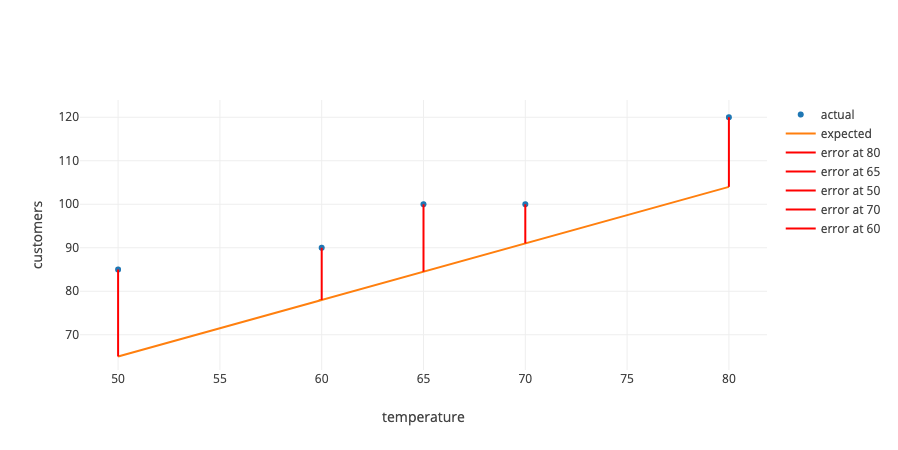

In [69]:
from error import error_line_traces
error_traces = error_line_traces(temperatures, amounts, calculated_errors)
plot([data_trace, model_trace, *error_traces], layout = layout)

Now let's calculate the `total_error`.  Use the errors function to create this.

In [2]:
def total_error(amounts, predicted_amounts):
    pass

In [71]:
total_error(amounts, predicted_amounts)
# 72.5

72.5

## Moving to Sum of Squared Error

Now our `total_error` metric happens to work fine with the data and model that we have above.  However, if we change our model, we'll see that our positive and negative errors can start to cancel each other out, which is not what we want.

For example, leaving our data the same, we'll change our model to the following: 

$$ amount\_of_\_customers = 1.6 * temperature $$.

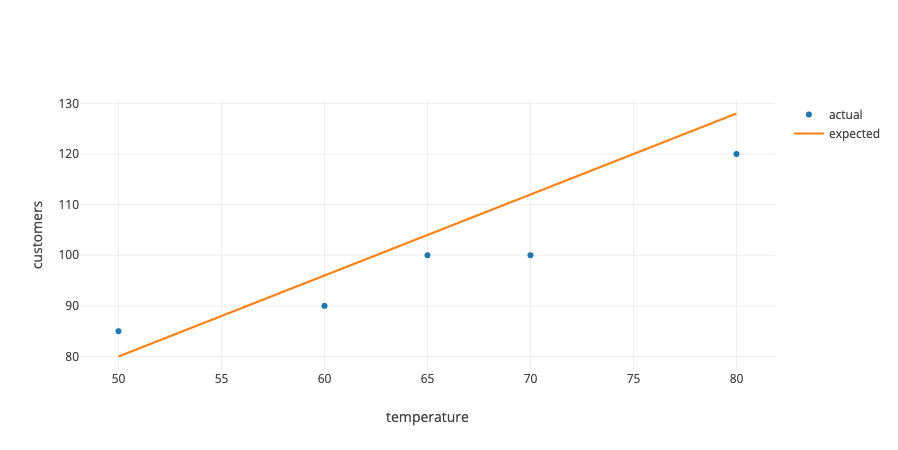

In [72]:
updated_predicted_amounts = list(map(lambda temperature: 1.6*temperature,temperatures))
updated_model_trace = trace_values(temperatures, updated_predicted_amounts, name = 'expected', mode = 'lines')

plot([data_trace, updated_model_trace], layout = layout)

 In the graph above, we can see that the error at our first temperature is 85 - 80 = 5, and the second error is 90 - 96 = -6, so adding up just these two errors gives us -1, which is not what we should get.
 
To fix this we decide to use the residual sum of squares (RSS) formula.  Write a function that calculates the RSS for a list of actual data and a list of expected data.  If you forget the RSS formula, you can [find it on Wikipedia](https://en.wikipedia.org/wiki/Residual_sum_of_squares).

In [6]:
def rss(actuals, expecteds):
    pass

In [7]:
rss(amounts, predicted_amounts)
# 1121.25

NameError: name 'predicted_amounts' is not defined

That was the SSE of our first model.  If we look at the SSE of our second model, we can see that our second model is much closer to our actual data.

In [77]:
sse(amounts, updated_predicted_amounts)

285.0